In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [2]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import class_weight
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [3]:
df = pd.read_csv("C:/Users/ADLIN/Downloads/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Select features and target
x = df[["gender", "SeniorCitizen", "Partner", "Dependents", "tenure", 
        "PhoneService", "InternetService", "MonthlyCharges", "TotalCharges"]]
y = df['Churn']

# Convert TotalCharges to numeric, fix missing
x['TotalCharges'] = pd.to_numeric(x['TotalCharges'], errors='coerce')
x['TotalCharges'].fillna(x['TotalCharges'].median(), inplace=True)

# Encode categorical features
cat_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'InternetService']
le = LabelEncoder()
for col in cat_cols:
    x[col] = le.fit_transform(x[col])
# Scale numerical features
num_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
scaler = MinMaxScaler()
x[num_cols] = scaler.fit_transform(x[num_cols])

# Encode target
y = le.fit_transform(y)  # 0=No, 1=Yes

C:\Users\ADLIN\AppData\Local\Temp\ipykernel_1364\2575219132.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['TotalCharges'] = pd.to_numeric(x['TotalCharges'], errors='coerce')
C:\Users\ADLIN\AppData\Local\Temp\ipykernel_1364\2575219132.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original objec

In [4]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42)

# Compute class weights to handle imbalance
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(zip(np.unique(y_train), class_weights))
print("Class weights:", class_weights)



Class weights: {np.int64(0): np.float64(0.6781292984869326), np.int64(1): np.float64(1.9034749034749034)}


In [5]:
# Build ANN model
model = keras.Sequential([
    keras.layers.Dense(32, input_shape=(x_train.shape[1],), activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    class_weight=class_weights
)

C:\Users\ADLIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.7010 - loss: 0.6738 - val_accuracy: 0.7191 - val_loss: 0.5904
Epoch 2/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7232 - loss: 0.5968 - val_accuracy: 0.6937 - val_loss: 0.5710
Epoch 3/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7273 - loss: 0.5492 - val_accuracy: 0.7454 - val_loss: 0.5092
Epoch 4/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7315 - loss: 0.5361 - val_accuracy: 0.7150 - val_loss: 0.5480
Epoch 5/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7258 - loss: 0.5338 - val_accuracy: 0.7485 - val_loss: 0.4880
Epoch 6/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7360 - loss: 0.5210 - val_accuracy: 0.7363 - val_loss: 0.5136
Epoch 7/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7304 - loss: 0.5337 - val_accuracy: 0.7312 - val_loss: 0.5236
Epoch 8/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7198 - loss: 0.5258 - val_accuracy: 0

In [6]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {accuracy:.4f}")

# Predict on test set
y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['No Churn', 'Churn']))


67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7669 - loss: 0.4761

Test Accuracy: 0.7577
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

Confusion Matrix:
 [[1162  377]
 [ 135  439]]

Classification Report:
               precision    recall  f1-score   support

    No Churn       0.90      0.76      0.82      1539
       Churn       0.54      0.76      0.63       574

    accuracy                           0.76      2113
   macro avg       0.72      0.76      0.73      2113
weighted avg       0.80      0.76      0.77      2113



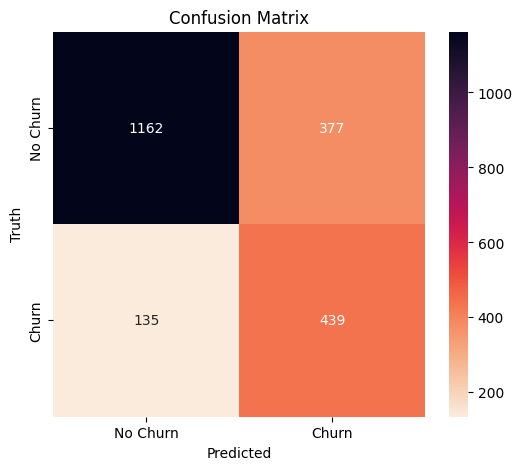

In [7]:
# Plot confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='rocket_r', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.title("Confusion Matrix")
plt.show()

In [8]:
new_data = x_test.iloc[:5]
pred_prob = model.predict(new_data)
pred_class = (pred_prob > 0.5).astype(int)

for i, prob in enumerate(pred_prob):
    print(f"Sample {i+1}: Probability of churn = {prob[0]:.3f}, Predicted class = {'Churn' if pred_class[i,0]==1 else 'No Churn'}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
Sample 1: Probability of churn = 0.726, Predicted class = Churn
Sample 2: Probability of churn = 0.091, Predicted class = No Churn
Sample 3: Probability of churn = 0.050, Predicted class = No Churn
Sample 4: Probability of churn = 0.840, Predicted class = Churn
Sample 5: Probability of churn = 0.064, Predicted class = No Churn


# to save the model

In [9]:
import joblib

In [10]:
# to save thhe model as .h5

model.save('Teleco-Customer-Churn.h5')

In [16]:
# to load the model

loaded_model = tf.keras.models.load_model('Teleco-Customer-Churn.h5')
loaded_model

<Sequential name=sequential, built=True>

In [18]:
# To save the scaling model
joblib.dump(scaler ,'Scaling.pkl')

['Scaling.pkl']

In [19]:
# to load the scaling model

loaded_scaling = joblib.load('Scaling.pkl')

In [20]:
loaded_model

<Sequential name=sequential, built=True>

In [21]:
x_test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,MonthlyCharges,TotalCharges
185,0,0.0,1,0,0.013889,0,0,0.065174,0.000692
2715,1,0.0,0,0,0.569444,1,2,0.069652,0.112814
3825,0,0.0,1,1,0.722222,1,2,0.010945,0.116882
1807,0,0.0,0,0,0.013889,1,1,0.578109,0.006641
132,1,0.0,0,0,0.930556,1,0,0.321393,0.374025
...,...,...,...,...,...,...,...,...,...
5522,0,0.0,0,0,0.013889,1,1,0.516418,0.005925
6377,1,0.0,0,0,0.013889,0,0,0.262687,0.002983
5500,1,0.0,1,1,0.833333,1,0,0.420398,0.424146
2392,1,0.0,0,0,0.277778,1,1,0.720896,0.203387


In [22]:
# to predict the loaded_model  with random x_test data

loaded_model.predict(x_test.iloc[[185]])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


array([[0.03270805]], dtype=float32)

In [23]:
# to print the columns list 

print(x_test.columns.tolist())

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'InternetService', 'MonthlyCharges', 'TotalCharges']
